In [20]:
from scipy import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("./data/OpenBCI-RAW-2024-09-04_17-56-48.csv", skiprows=4)
data.columns = data.columns.str.strip()

In [22]:
# Contoh label untuk setiap window
labels = ['resting'] * 20 + ['go/nogo'] * 20 + ['viat-map'] * 20
print(labels)

['resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'resting', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'go/nogo', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map', 'viat-map']


In [23]:
print(data.keys())

Index(['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'Accel Channel 0', 'Accel Channel 1',
       'Accel Channel 2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4',
       'Other.5', 'Other.6', 'Analog Channel 0', 'Analog Channel 1',
       'Analog Channel 2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)'],
      dtype='object')


In [4]:
print(data)

       Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  \
0               0.0   -6496.176898   -6579.213629   -6330.394009   
1               1.0   -6499.328494   -6582.119355   -6333.456198   
2               2.0   -6490.879535   -6575.100908   -6326.929489   
3               3.0   -6488.353787   -6572.798678   -6324.560204   
4               4.0   -6490.544258   -6574.475059   -6326.013067   
...             ...            ...            ...            ...   
34735         175.0   -3874.764308   -3884.934352   -3858.648701   
34736         176.0   -3882.341550   -3891.595172   -3865.421279   
34737         177.0   -3879.167602   -3888.823556   -3863.342567   
34738         178.0   -3865.287169   -3876.485393   -3851.272625   
34739         179.0   -3864.393099   -3875.524268   -3849.775058   

       EXG Channel 3  EXG Channel 4  EXG Channel 5  EXG Channel 6  \
0       -6622.173682  -13086.611102  -11918.263068  -13341.242175   
1       -6624.922946  -13089.539181  -11921.0

In [24]:
import numpy as np

# Parameter windowing
window_size = 250  # Contoh: 1 detik data dengan sampling rate 250 Hz
step_size = 125    # Overlap 50%

# Fungsi untuk windowing
def apply_windowing(data, window_size, step_size):
    windows = []
    for start in range(0, len(data) - window_size, step_size):
        window = data[start:start + window_size]
        windows.append(window)
    return np.array(windows)

# Contoh: Terapkan windowing pada satu channel
channel_data = data['EXG Channel 0'].values
windows = apply_windowing(channel_data, window_size, step_size)
print(f"Jumlah window: {len(windows)}")

Jumlah window: 276


In [25]:
print(windows)

[[-6496.17689802 -6499.32849399 -6490.87953459 ... -6480.75419435
  -6476.61912163 -6479.01075828]
 [-6490.41014795 -6492.89119159 -6481.33533971 ... -6474.83098207
  -6471.34410993 -6475.5015344 ]
 [-6485.06808103 -6487.07973803 -6478.60842688 ... -6474.00396752
  -6468.30427269 -6471.94760703]
 ...
 [-3887.75067183 -3891.34930269 -3886.40956717 ... -3882.07332874
  -3871.79152629 -3874.25021818]
 [-3883.77206132 -3889.33764569 -3886.43191891 ... -3875.27839843
  -3862.82847677 -3862.24733141]
 [-3883.70500609 -3890.34347419 -3888.04124451 ... -3874.33962516
  -3863.76725003 -3868.57287509]]


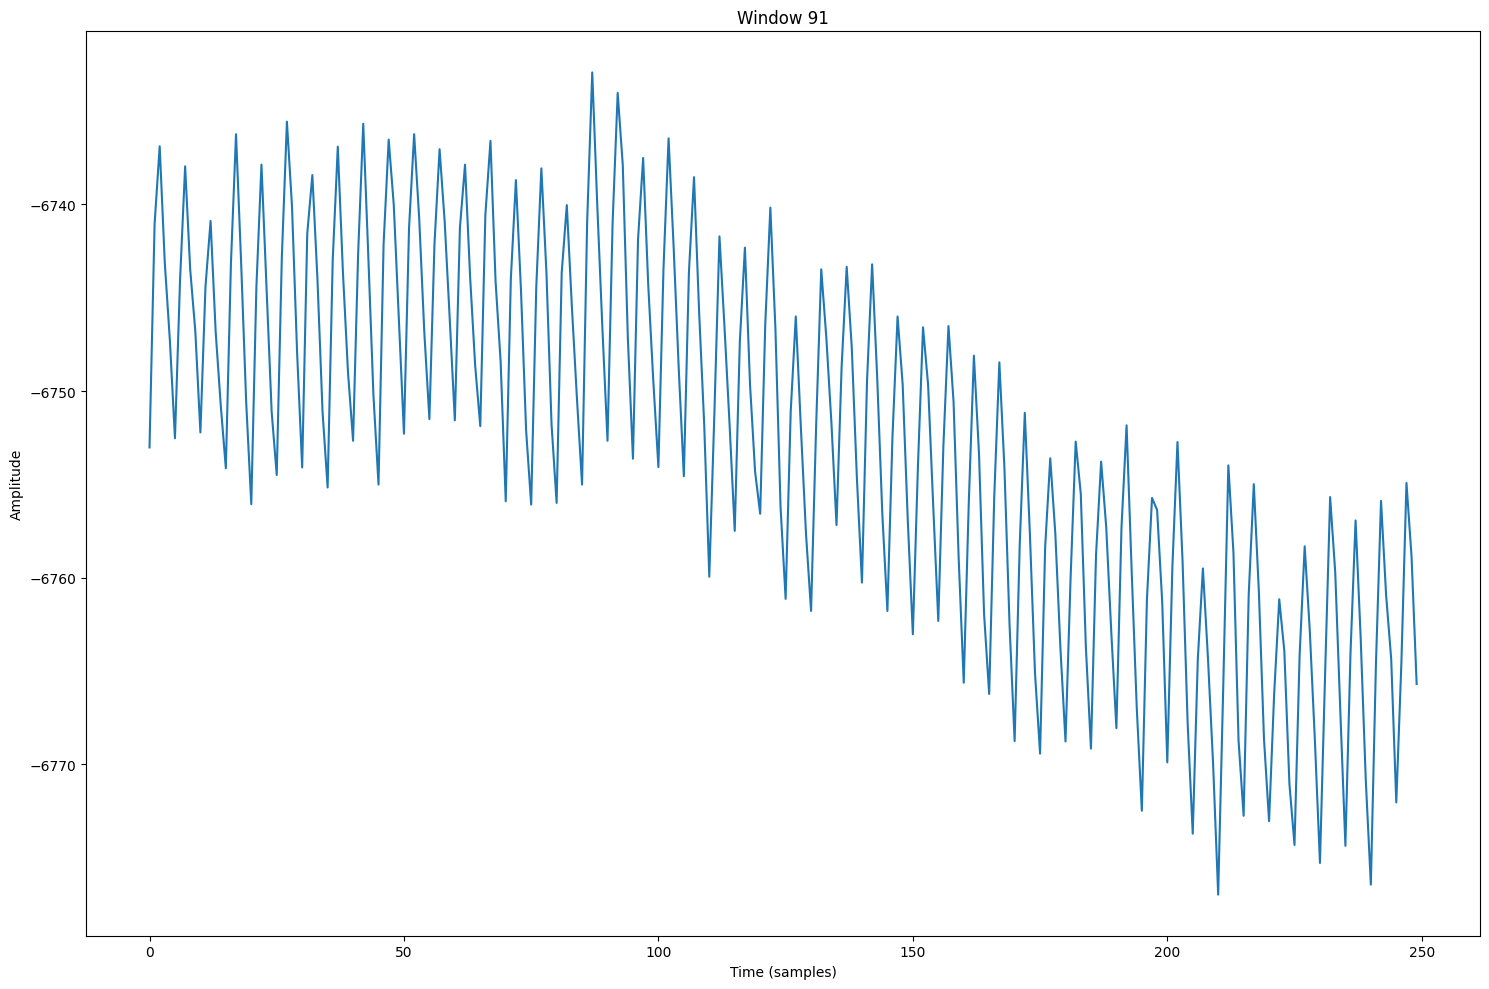

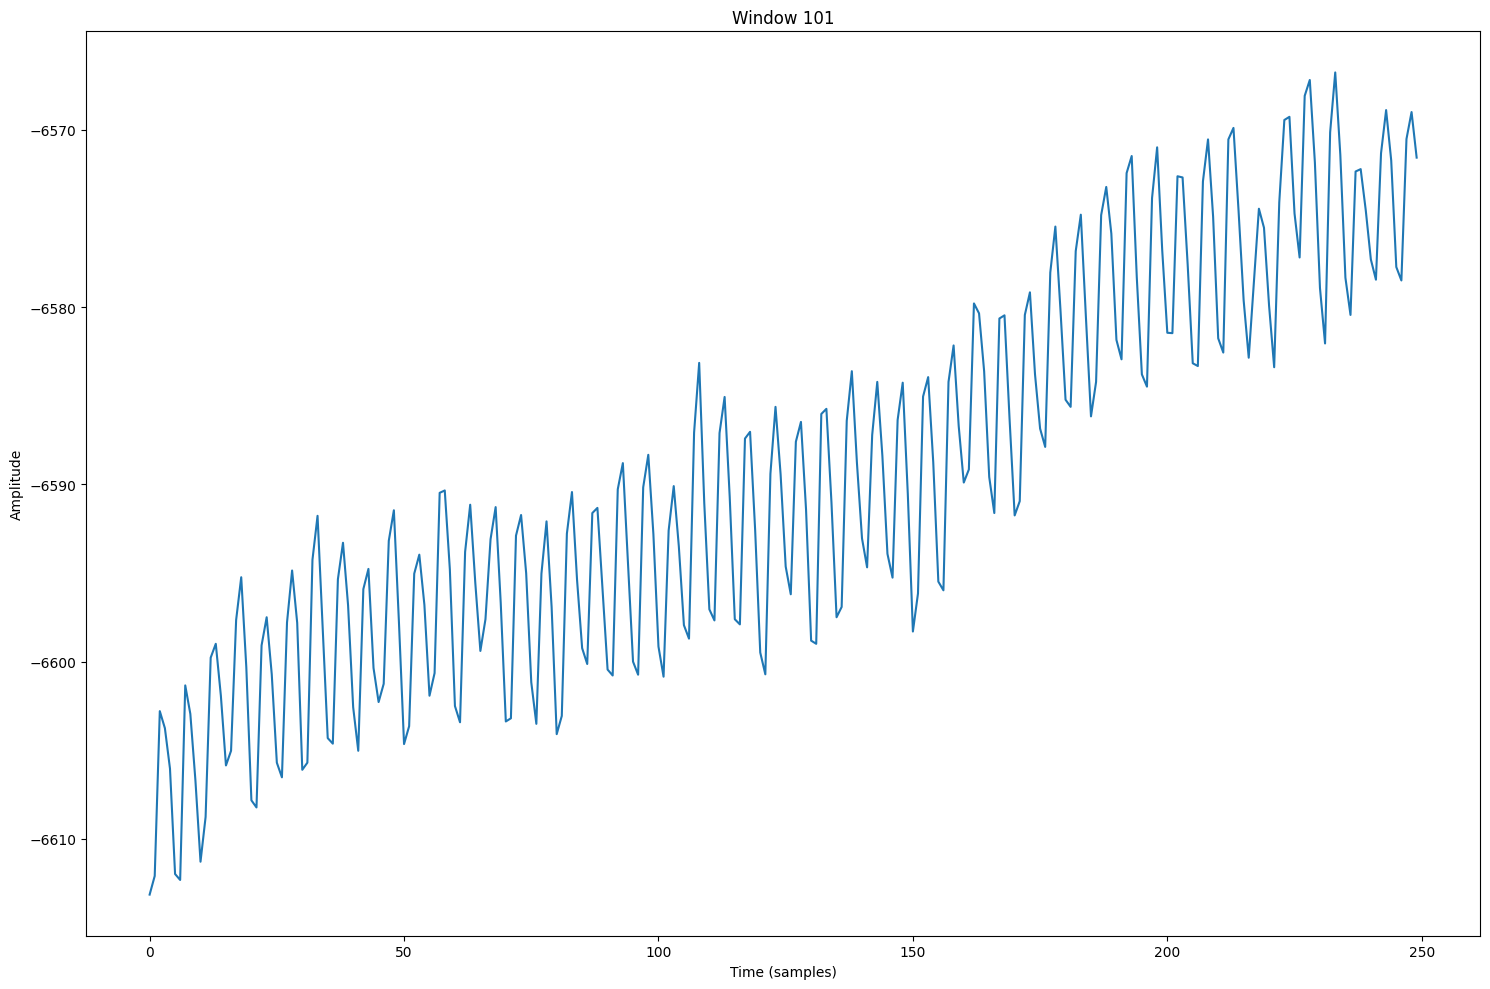

In [30]:
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi time series setiap window
def plot_time_series(window):
    plt.figure(figsize=(15, 10))
    plt.plot(windows[window])
    plt.title(f"Window {window + 1}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Contoh: Plot 5 window pertama Contoh: Plot 5 window pertama
plot_time_series(90)
plot_time_series(100)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler(feature_range=(-1, 1))
windows_normalized = scaler.fit_transform(windows)

In [12]:
from scipy.signal import butter, filtfilt

# Fungsi untuk bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Contoh: Terapkan bandpass filter (0.5 Hz - 40 Hz)
fs = 250  # Sampling rate
windows_filtered = bandpass_filter(windows_normalized, lowcut=0.5, highcut=40, fs=fs)

In [13]:
from scipy.signal import iirnotch, filtfilt

# Fungsi untuk notch filter
def notch_filter(data, freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    freq = freq / nyquist
    b, a = iirnotch(freq, quality_factor)
    return filtfilt(b, a, data, axis=0)

# Contoh: Terapkan notch filter (50 Hz)
windows_notch_filtered = notch_filter(windows_filtered, freq=50, fs=fs)

In [14]:
# Fungsi untuk ekstraksi fitur
def extract_features(data):
    features = []
    for window in data:
        mean = np.mean(window)
        std = np.std(window)
        variance = np.var(window)
        features.append([mean, std, variance])
    return np.array(features)

# Ekstraksi fitur dari data yang sudah diproses
features = extract_features(windows_notch_filtered)
print(f"Shape fitur: {features.shape}")

Shape fitur: (276, 3)


In [15]:
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi time series setiap window
def plot_time_series(windows, window_labels, num_windows_to_plot=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_windows_to_plot):
        plt.subplot(num_windows_to_plot, 1, i + 1)
        plt.plot(windows[i])
        plt.title(f"Window {i + 1} - Label: {window_labels[i]}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Contoh: Plot 5 window pertama
plot_time_series(windows_notch_filtered, window_labels, num_windows_to_plot=5)

NameError: name 'window_labels' is not defined

In [ ]:
# Contoh: Membuat label (misalnya, 0 untuk kelas A, 1 untuk kelas B)
labels = np.array([0] * len(features))  # Ganti dengan label yang sesuai

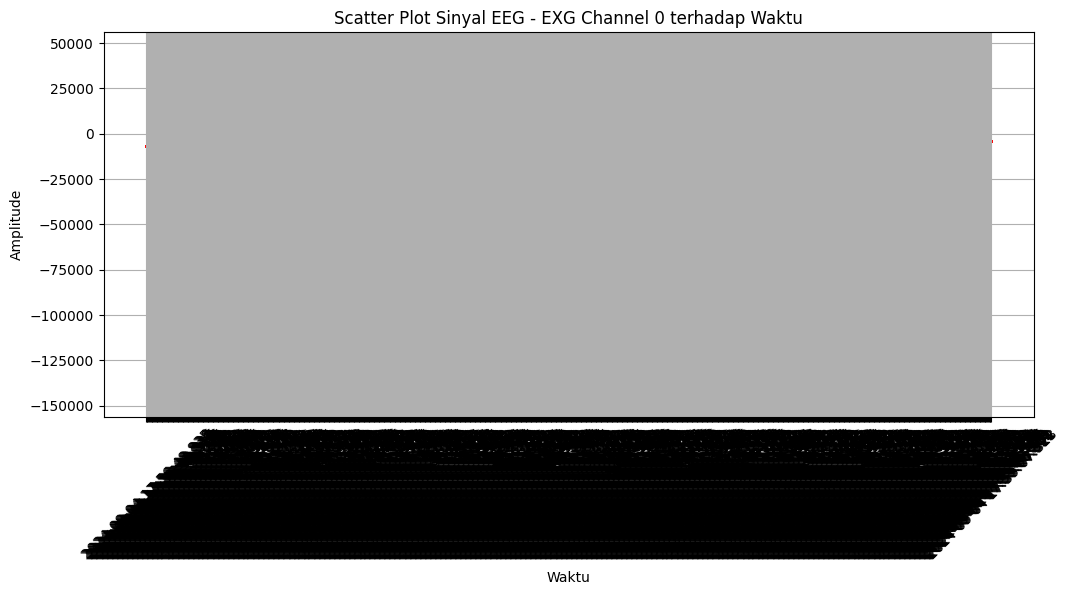

In [6]:
plt.figure(figsize=(12, 5))
plt.scatter(data["Timestamp (Formatted)"], data["EXG Channel 0"], color='r', s=1)

plt.xlabel("Waktu")
plt.ylabel("Amplitude")
plt.xticks(rotation=45)  # Rotasi label waktu agar lebih terbaca
plt.title("Scatter Plot Sinyal EEG - EXG Channel 0 terhadap Waktu")
plt.grid()
plt.show()


In [ ]:
def window_function():
    print(True)

In [2]:
import numpy as np
import scipy.signal as signal
import mne
import pandas as pd
# Contoh data EEG (gantilah dengan data EEG Anda)
# Misalnya, data EEG memiliki 4 channel dan 1000 sample points
eeg_data = pd.read_csv("./data/OpenBCI-RAW-2024-09-04_17-56-48.csv", skiprows=4)
eeg_data.columns = eeg_data.columns.str.strip()
sampling_rate = 250  # Sampling rate 250 Hz

# 1. Windowing
def apply_windowing(data, window_size, overlap):
    """
    Menerapkan windowing pada data EEG.
    
    Parameters:
        data (numpy array): Data EEG dengan bentuk (channel, sample).
        window_size (int): Ukuran window dalam sample.
        overlap (int): Overlap antar window dalam sample.
    
    Returns:
        windowed_data (list): List dari windowed data.
    """
    windowed_data = []
    n_samples = data.shape[1]
    step = window_size - overlap
    
    for start in range(0, n_samples - window_size + 1, step):
        window = data[:, start:start + window_size]
        windowed_data.append(window)
    
    return windowed_data

window_size = 250  # Misalnya, window size 1 detik (250 sample)
overlap = 125  # Overlap 0.5 detik (125 sample)
windowed_data = apply_windowing(eeg_data, window_size, overlap)

# 2. Normalisasi
def normalize_data(data):
    """
    Normalisasi data EEG dengan z-score normalization.
    
    Parameters:
        data (numpy array): Data EEG dengan bentuk (channel, sample).
    
    Returns:
        normalized_data (numpy array): Data EEG yang telah dinormalisasi.
    """
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)
    normalized_data = (data - mean) / std
    return normalized_data

normalized_data = [normalize_data(window) for window in windowed_data]

# 3. Bandpass Filter
def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Menerapkan bandpass filter pada data EEG.
    
    Parameters:
        data (numpy array): Data EEG dengan bentuk (channel, sample).
        lowcut (float): Frekuensi cutoff rendah (Hz).
        highcut (float): Frekuensi cutoff tinggi (Hz).
        fs (float): Sampling rate (Hz).
        order (int): Order filter.
    
    Returns:
        filtered_data (numpy array): Data EEG yang telah difilter.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

lowcut = 1.0  # Frekuensi cutoff rendah 1 Hz
highcut = 50.0  # Frekuensi cutoff tinggi 50 Hz
filtered_data = [apply_bandpass_filter(window, lowcut, highcut, sampling_rate) for window in normalized_data]

# 4. Notch Filter
def apply_notch_filter(data, notch_freq, fs, quality_factor=30):
    """
    Menerapkan notch filter pada data EEG.
    
    Parameters:
        data (numpy array): Data EEG dengan bentuk (channel, sample).
        notch_freq (float): Frekuensi notch (Hz).
        fs (float): Sampling rate (Hz).
        quality_factor (float): Quality factor dari filter.
    
    Returns:
        filtered_data (numpy array): Data EEG yang telah difilter.
    """
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = signal.iirnotch(freq, quality_factor)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

notch_freq = 50.0  # Frekuensi notch 50 Hz (untuk menghilangkan noise listrik)
final_data = [apply_notch_filter(window, notch_freq, sampling_rate) for window in filtered_data]

# Hasil akhir adalah list dari windowed, normalized, dan filtered data
print(final_data)

[]
